# DRL Assignment 01
||||
|---|---|---|
| Mohamad Aljammal | maljammal | 998134 |
| Anna Joline Lippold | alippold | 996163 |
| Pit Sinning | psinning | 996134 |


#### 1.
##### 1.1)
chess as MDP :  
for any possible valid chess board configuration (state), choose the optimal move (action) of all possible valid moves of one color of players.

state representation :  
8x8 or 64 dimentional array where 0 -> free , 1-12 different types of pieces ( 1-6 white pieces , 7-12 black pieces ) // or tuple (piece type , color)

state space (set of all States) :   
S = { all possible // valid ? // chess board configurations } 

action state (set of all actions) :   
A(s) = { all possible valid moves of all pieces of the agent assigned color in state (s) }

transition function (environment dynamics) :   
P(s', r | s , a ) = 1 // it is feasible to model the environment dynamics of chess as deterministic

Reward function :   
r(a,s) = -0.1    
r(a,moved_pieced_under_attack) = -0.5   
r(a,captured_piece) = +2      
r(a,check) = +1   
r(a,WIN-state) = +10000    
r(a,LOSS-state) = -10000    

Discounting factor :   
$\gamma$ = 0.8

Policy :    
$\Pi$(a,s) = [ probability distribution of action (a) in the set of all actions (A(s)) ]


##### 1.2 
lunar lander as MDP :    
an agent is controlling a spaceship for it's landing, by choosing the optimal adjustment on the thrust engins of the ship in a given location and momentum(speed / acceleration / rotation )

state representation :    
The state is an 8-dimensional vector: the coordinates of the lander in x & y, its linear velocities in x & y, its angle, its angular velocity, and two booleans that represent whether each leg is in contact with the ground or not.

state space (set of all States) :   
S = { all possible locations with all possible speed/acceleration, angles , angular velocities and leg states((not)in contact)} 

action state (set of all actions) :    
A(s) = {

    0: do nothing,

    1: fire left orientation engine,

    2: fire main engine,

    3: fire right orientation engine

}

transition function (environment dynamics) :   
P(s', r | s , a ) = 1

Reward function :   
r(a,leg_in_contact) = +10   
r(a,side_engine_firing) = -0.03    
r(a,main_engine_firing) = -0.3   
r(a,landing_safely) = +100   
r(a,crashing) = -100   
is increased/decreased the closer/further the lander is to the landing pad.   
is increased/decreased the slower/faster the lander is moving.   
is decreased the more the lander is tilted (angle not horizontal).    


Discounting factor :   
Lamda = 1

Policy :    
$\Pi$(a,s) = [ probability distribution of action (a) in the set of all actions (A(s)) ]

##### 1.3

* the environment dynamics are the formalization of modeling uncertainties in the environment, performing action a in a state s doesn't always lead to the same s_t+1, rather it could lead to other states due to some issues in exection or enviromental effects , and each state has achieven from (a,s) has a reward. the transition function is then a propability distribution over the set of resulting states given an action a in a state s, where the reward function in then the propability of getting a reward r given action a in state s.   
    examples : 
    1. robotic navigation, moving right could still result in moving forward with a propability x due to some software/hardware issues.
    2. satellite control in orbit, actions might be disturbed due to multiple environmental issues.

* the environment dynamics are not allways known or easy to formulate ,but I think they are/can be used in practical applications to approximate reallity better. 

### 2. & 3.) 
##### sorry for the lack of comments.

resources :  
https://www.datascienceblog.net/post/reinforcement-learning/mdps_dynamic_programming/   
https://github.com/yigitunallar/reinforcement-learning-on-simple-grid-world-game/blob/master/README.md  
https://medium.com/mlearning-ai/applying-reinforcement-learning-algorithms-to-solve-gridworld-problems-29998406dd75     
https://cs.stanford.edu/people/karpathy/reinforcejs/gridworld_dp.html   

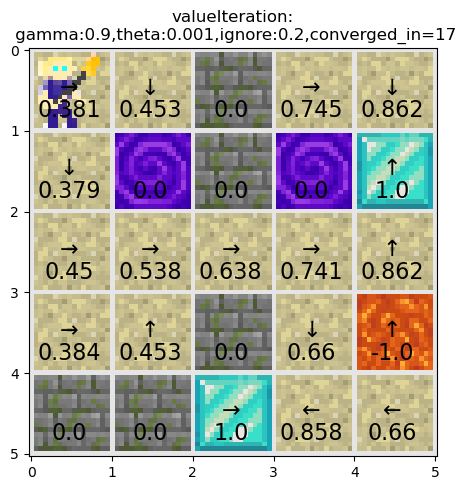

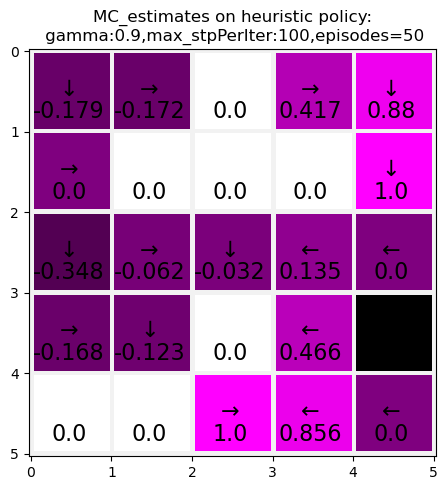

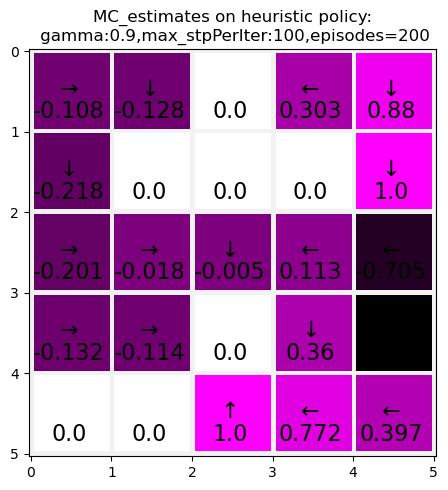

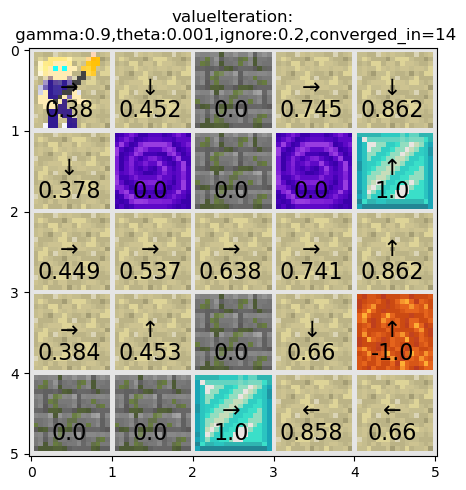

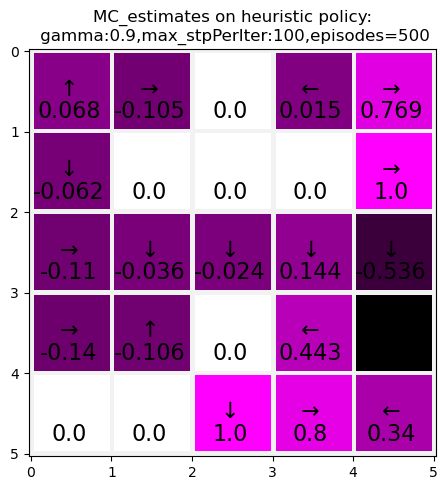

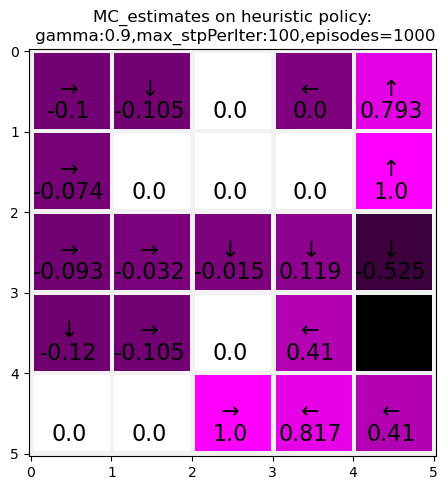

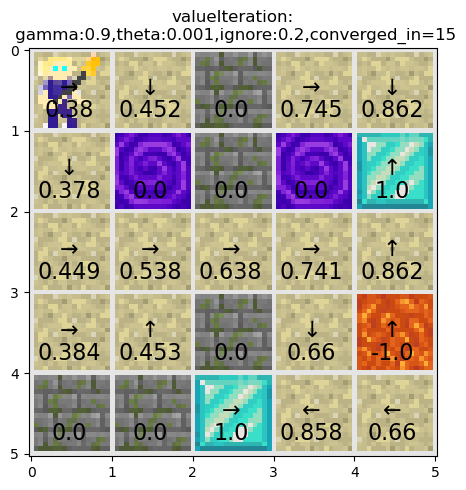

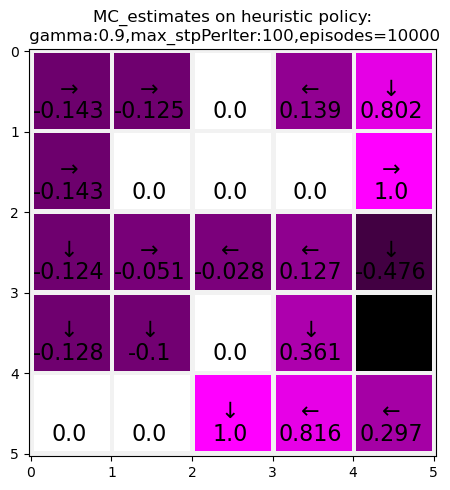

In [1]:
from rl_agent import Agent # own implementations
from rl_environment import GridWorld # own implementations
from rl_render import Render # own implementations
import numpy as np 
import matplotlib.pyplot as plt
import logging
import warnings

warnings.filterwarnings('ignore')
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(lineno)d - %(levelname)s : %(message)s',
                     datefmt='%H:%M:%S')
logger = logging.getLogger('my-logger')
# logger.propagate = False
logger.disabled = True

# ploting settings
plt.rcParams["figure.figsize"] = [5, 5]
plt.rcParams["figure.autolayout"] = True

if __name__ == "__main__":
    # variables for training
    episodes_list = [50,200,500,1000,10000]
    # for both value iteration and MC estimates
    gamma=0.9
    # only for value iteration
    theta=0.001
    ignore_converged_s=0.2
    # only for MC estimates
    max_steps_per_iteration=100

    # variables for rendering , of one cell in the grid
    scale = 16
    
    # creating simple grid
    world = GridWorld(5,5 ,
            terminalState={'goal': [(1,4)],
                        'negative_goal': [(3,4)]},
            terrain={'wall': [(0,2),(1,2),(3,2)]},
            setRewards= {'default': -0.02},
            environmentDynamics='stochastic')
    # creating an agent in the gridworld
    agent = Agent(environment=world)
    # creating render object 
    render = Render(env=world, agent=agent, scale=scale)
    # initiate rendering resources
    render.init_rendering_resources(configuration=0)
    # render.start()

    # show simple grid
    # render.renderEnv(style='image', title='Simple Grid', results=False)

    # adding more complexity to the grid (terrains and goals)
    world.addTerminal(('goal',[(4,2)]))
    world.addTerrain(('wall',[(4,0),(4,1)]),('shortcut', [(1,1),(1,3)]))
    # show complex grid
    # render.renderEnv(style='image', title='more complex Grid', results=False)
    # delete objects from the grid
    # world.deleteObject((4,0),(4,2))
    # render.renderEnv(style='image', title='more complex Grid', results=False)


    # trainig a model for x episodes using value iteration and MC estimates
    for episodes in episodes_list:
        if episodes in episodes_list[::2]: # value iteration
            _ , iterations = agent.valueIteration(world, max_iterations=episodes, gamma=gamma, theta=theta , ignore=ignore_converged_s) 
            render.renderEnv(style='image', results=True,
                title=f'valueIteration:\n gamma:{gamma},theta:{theta},ignore:{ignore_converged_s},converged_in={iterations}')
            
        if episodes in episodes_list[:]: # MC estimates policy evaluation
            agent.policy = agent.policyGenerator(world)
            agent.evaluatePolicy_MC(world, policy=agent.policy, samples=episodes , max_steps=max_steps_per_iteration)
            agent.policy = agent.prob_to_determin_policy(world, agent.policy)
            render.renderEnv(style='color map', results=True,
                title=f'MC_estimates on heuristic policy:\n gamma:{gamma},max_stpPerIter:{max_steps_per_iteration},episodes={episodes}')
    # render.end()
    render.show()

